In [2]:
import ogr
import numpy as np
import numpy.ma as ma
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import chi2,norm,normaltest
from skimage.filters import threshold_otsu, threshold_yen, threshold_li
from helpers import *

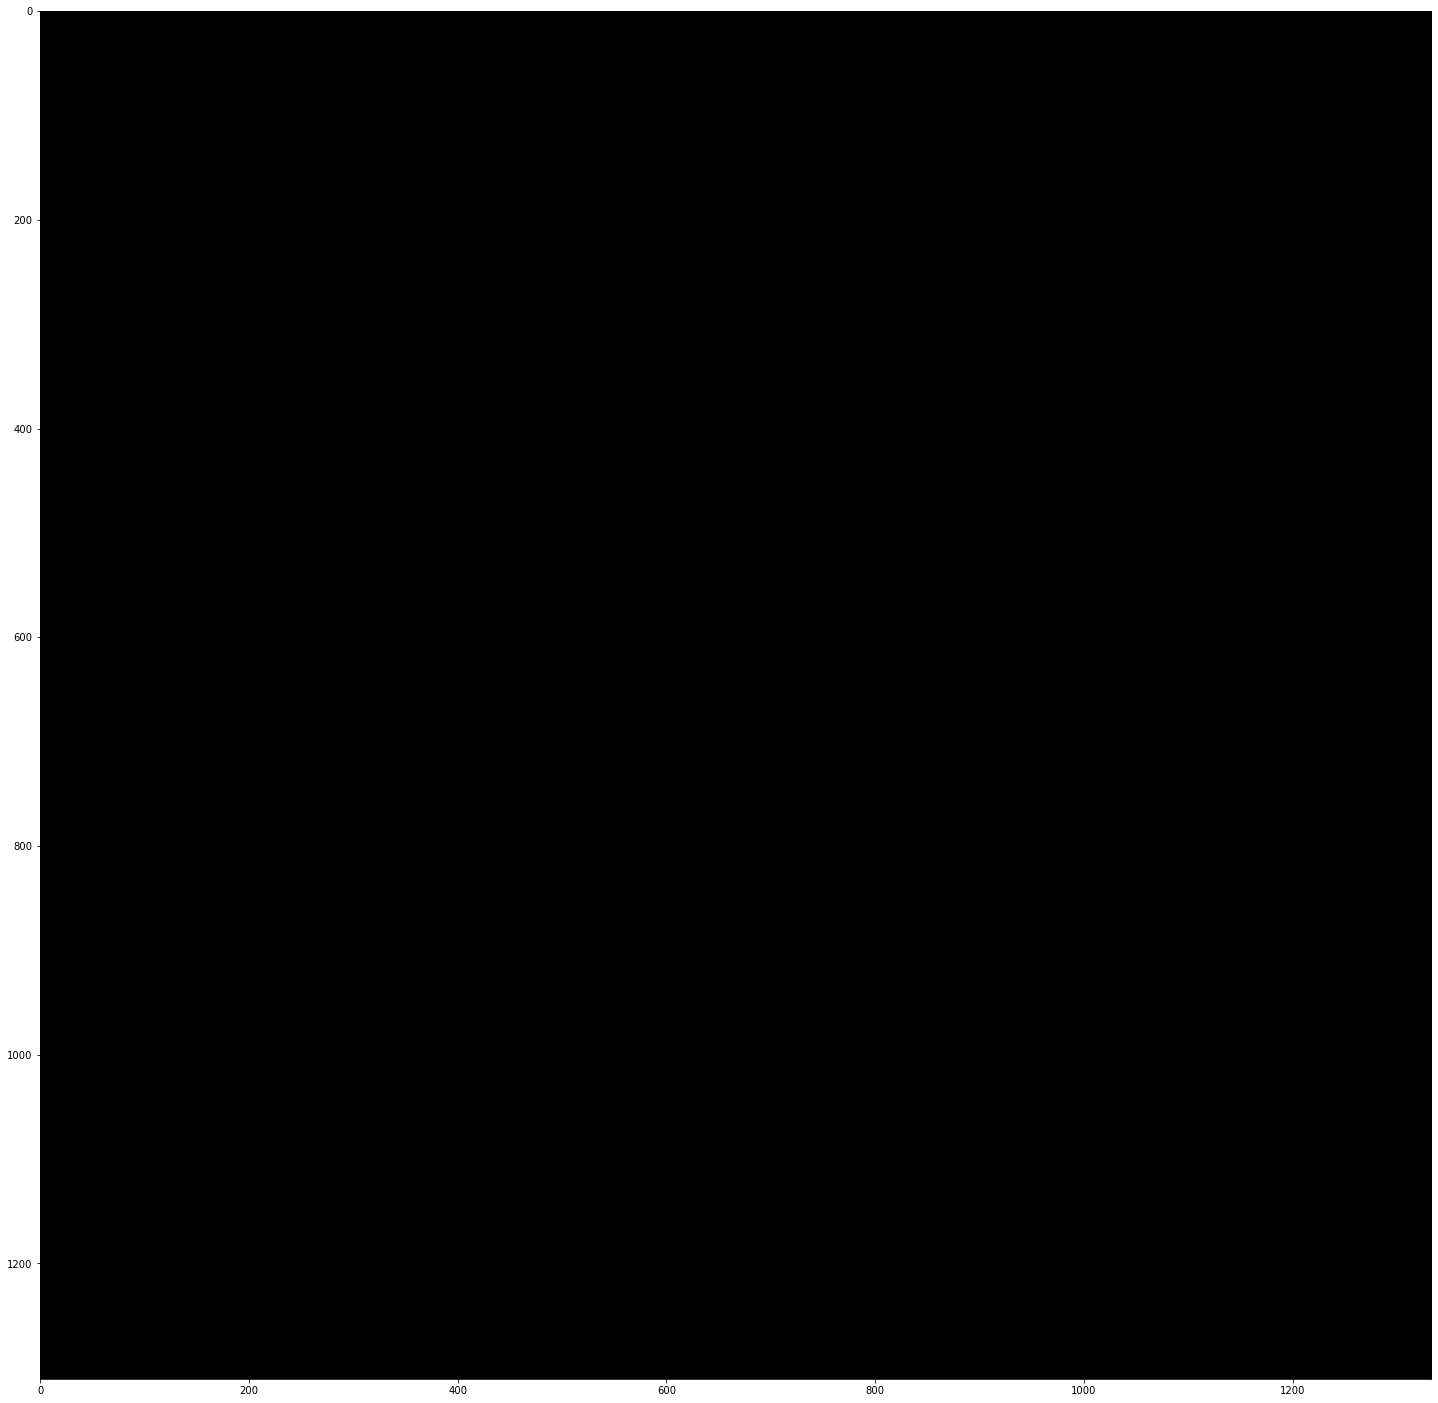

In [5]:
#shapefile filter
ds = gdal.Open('data/backscatterCharpiya20171220.tif')


# Filename of input OGR file
vector_fn = 'data/InsideCharpiya.shp'

# Filename of the raster Tiff that will be created
raster_fn = 'data/InsideCharpiya.tif'

# Open the data source and read in the extent
source_ds = ogr.Open(vector_fn)
source_layer = source_ds.GetLayer()

# Create the destination data source
target_ds = gdal.GetDriverByName('GTiff').Create(raster_fn, ds.RasterXSize, ds.RasterYSize, 1, gdal.GDT_Byte)
target_ds.SetGeoTransform(ds.GetGeoTransform())
band = target_ds.GetRasterBand(1)


# Rasterize
gdal.RasterizeLayer(target_ds, [1], source_layer, burn_values=[1])

shapefile_mask=read_raster_band(raster_fn,1)
plot_bands_row(shapefile_mask,vmin=0,vmax=2)

#plot_bands_row(dlr,vmin=-6,vmax=6,cmap=plt.cm.bwr)
#plot_bands_row(dlr[:,:,0]*shapefile_mask,vmin=-6,vmax=6,cmap=plt.cm.bwr)